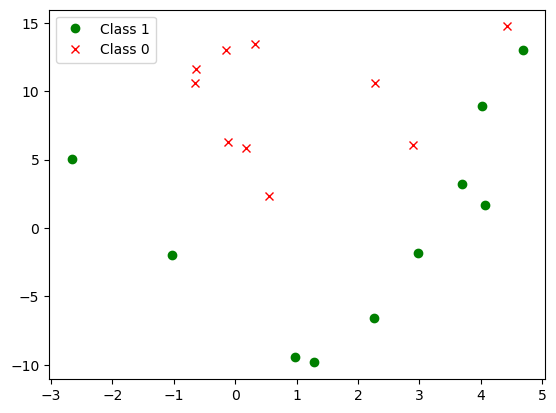

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# 读取训练数据
train = np.loadtxt('images3.csv', delimiter=',', skiprows=1)
train_x = train[:, 0:2]  # 获取前两列作为特征
train_y = train[:, 2]    # 获取第三列作为标签

# 绘制数据点
plt.plot(train_x[train_y == 1, 0], train_x[train_y == 1, 1], 'go', label='Class 1')
plt.plot(train_x[train_y == 0, 0], train_x[train_y == 0, 1], 'rx', label='Class 0')
plt.legend()
plt.show()


In [56]:
# 参数初始化
theta = np.random.rand(4)  #要用二次函数， 增加一参数x3

# 标准化
mu = train_x.mean(axis=0)
sigma = train_x.std(axis=0)

def standardize(x):
    return (x - mu) / sigma

train_z = standardize(train_x)
# 增加 x0 和 x3
def to_matrix(x):
    x0 = np.ones((x.shape[0], 1))  # 添加偏置项 x0
    x3 = x[:, 0, np.newaxis] ** 2  # 计算 x1 的平方并作为 x3
    return np.hstack((x0, x, x3))  # 水平堆叠 x0, x 和 x3
#
# 使用标准化后的数据 train_z
X = to_matrix(train_z)


在特征工程过程中，通常会进行多次实验，尝试不同的特征组合，选择那些能够显著提高模型性能的特征。在这种情况下，可能实验结果表明增加,x1的平方项比增加x2 的平方项效果更好。

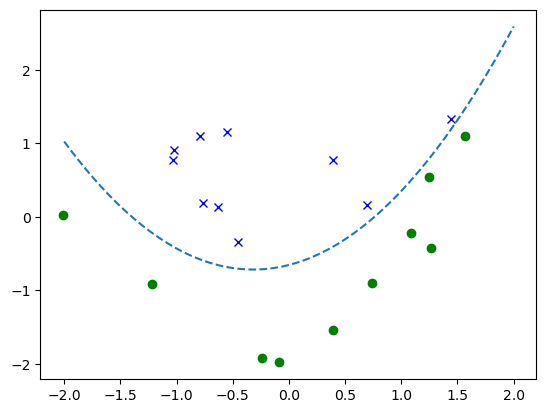

In [57]:
# sigmoid 函数
def f(x):
    return 1 / (1 + np.exp(-np.dot(x, theta)))
def classify(x):
    return (f(x)>=0.8).astype(int)
classify(to_matrix(standardize([[200,100],[100,200]]))) 
# 学习率
ETA = 1e-3

# 重复次数
epoch = 5000
# 重复学习
for _ in range(epoch):
    theta = theta - ETA * np.dot(f(X)- train_y,X)

x1 = np.linspace(-2, 2, 100)

x2 = -(theta[0] + theta[1] * x1 + theta[3] * x1 ** 2) / theta[2]

plt.plot(train_z[train_y == 1, 0], train_z[train_y == 1, 1], 'go')
plt.plot(train_z[train_y == 0, 0], train_z[train_y == 0, 1], 'bx')
plt.plot(x1, x2, linestyle='dashed')
plt.show()

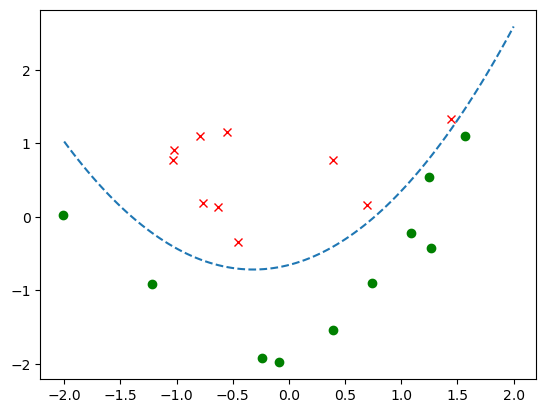

In [58]:
#对四个参数的theta.T x=0  这样变形  变为x2=-。。。。。
x1 = np.linspace(-2, 2, 100)
x2 = -(theta[0] + theta[1] * x1 + theta[3] * x1 ** 2) / theta[2]
plt.plot(train_z[train_y==1, 0], train_z[train_y==1, 1], 'go')
plt.plot(train_z[train_y==0, 0], train_z[train_y==0, 1], 'rx')
plt.plot(x1, x2, linestyle='dashed')
plt.show()

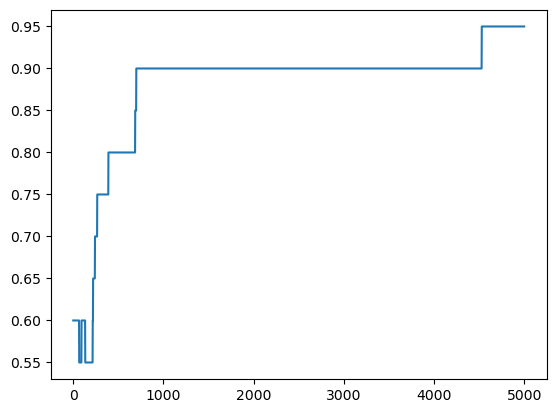

In [60]:
#将重复次数作为横轴，精度为纵轴
#这个值是被正确分类的数据个数占全部个数的比例。
# 参数初始化
theta = np.random.rand(4)

# 精度的历史记录
accuracies = []

# 重复学习
for _ in range(epoch):
    theta = theta - ETA * np.dot(f(X) - train_y, X)
    
    # 计算现在的精度
    result = classify(X) == train_y
    accuracy = len(result[result == True]) / len(result)
    accuracies.append(accuracy)

# 将精度画成图
x = np.arange(len(accuracies))

plt.plot(x, accuracies)
plt.show()
#也可根据精度达到满意度，就停止学习


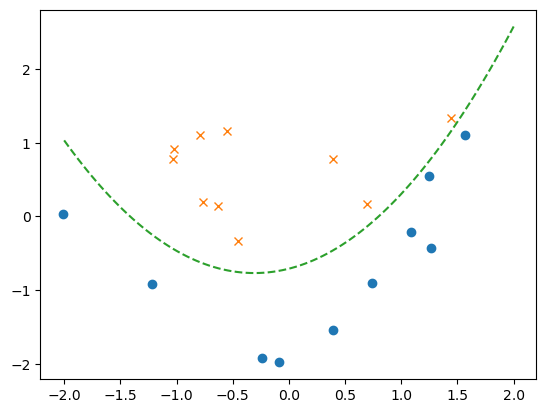

In [64]:
#使用随机梯度下降法 实现
#参数初始化 theta =np.random.rand(4)
for _ in range(epoch):
    p=np.random.permutation(X.shape[0])
    for x,y in zip(X[p], train_y[p]):
        theta = theta - ETA * (f(x)-y)*x
x1 = np.linspace(-2, 2, 100)

x2 = -(theta[0] + theta[1] * x1 + theta[3] * x1 ** 2) / theta[2]

plt.plot(train_z[train_y == 1, 0], train_z[train_y == 1, 1], 'o')
plt.plot(train_z[train_y == 0, 0], train_z[train_y == 0, 1], 'x')
plt.plot(x1, x2, linestyle='dashed')
plt.show()


梯度下降可以用于回归和分类问题。它的主要目标是通过迭代更新参数来最小化损失函数。